# Course 2: Python project 04

## PART I: EDA & Data Preprocessing on Google App Store Rating Dataset.
**Domain:** Mobile Device apps
***


## Dataset Information:
Web scraped data of 10k Play Store apps for analyzing the Android market. Each app (row) has values for
category, rating, size, and more.
***
### Attribute Information:

|**Slno.**|	**Attribute**	|**Description**|
|:----|:----------|:----------|
|1	|App	        |Application name|
|2	|Category	    |Category the app belongs to.|
|3	|Rating	        |Overall user rating of the app|
|4	|Size	        |Size of the app|
|5	|Installs	    |Number of user reviews for the app|
|6	|Type	        |Paid or Free|
|7	|Price	        |Price of the app|
|8	|Content Rating |Age group the app is targeted at - children/Mature 21+ /Adult|
|9	|Genres	        |An app can belong to multiple genres (apart from its main category).|
|10	|Last Updated	|Date when the app was last updated on play store.|
|11	|Current Ver	|Current version of the app available on play store.|
|12	|Android Ver	|Min required Android Version.|


### Objective:
 To explore the data and pre-process it for future use in any predictive analytics study.
 ***

### 1.0 Import required libraries and read the dataset.

In [225]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [226]:
df = pd.read_csv("C:\\Users\\bhara\\Downloads\\Apps_data+(1).csv")

***

### 2.0 Check the first few samples, shape, info of the data and try to familiarize yourself with different features.



In [227]:
df.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
66,Used Cars Mexico,AUTO_AND_VEHICLES,4.0,190,2.5M,"50,000+",Free,0,Everyone,Auto & Vehicles,"October 14, 2016",1.0,2.3 and up
1743,Hill Climb Racing 2,GAME,4.6,2750410,Varies with device,"100,000,000+",Free,0,Everyone,Racing,"August 2, 2018",1.17.2,4.2 and up
1869,Candy Crush Saga,GAME,4.4,22430188,74M,"500,000,000+",Free,0,Everyone,Casual,"July 5, 2018",1.129.0.2,4.1 and up
9048,Elemental Galaxy Dx - Match3,FAMILY,4.0,127,14M,"10,000+",Free,0,Everyone,Puzzle,"March 11, 2014",1.0.9,2.2 and up
9042,Tricky Bike Stunt Rider DX,FAMILY,4.4,16,45M,500+,Free,0,Everyone,Simulation;Education,"July 29, 2018",1.1.1,4.0 and up


In [228]:
df.shape

(10841, 13)

In [229]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


- Data types of 12 columns out of 13 are object. Even some of the numerical variables data type is object.
- Only column Rating data type is Float.

In [230]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

***

### 3.0   Check summary statistics of the dataset. List out the columns that need to be worked upon for model building.


In [231]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [232]:
df.describe(include='object')

,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,596,1695,1579,10039,10040,8714,842,326,1459,2451


- summary stats of column rating shows that the 75% of the data has rating of 4.5
- minimum rating of 1.
- There may be less outliers present since mean and median are close to each other.

Some of the numerical variables datatype needs to be changed, like price , size, Reviews,Installs and some of the un wanted columns needs to be removed like Android Ver,current Ver , App.

For model building column Ratings as dependent variable(y)
and remaining significant variables as independent variables(X).

***

### 4.0 Check if there are any duplicate records in the dataset? if any drop them.

In [233]:
df.drop_duplicates(keep='first',inplace=True)
df.reset_index(drop=True)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10353,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10354,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10355,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10356,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [234]:
df.duplicated().sum()

0

Duplicate values in the dataset have been dropped.
***

### 5.0 Check the unique categories of the column 'Category', Is there any invalid category? If yes, drop them.

In [235]:
df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [236]:
invalid_cat = df[df['Category']=='1.9']

In [237]:
df.drop(invalid_cat.index,inplace=True)

In [238]:
df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

There are several unique categories in the data, but **Category 1.9** is not a valid category , so category 1.9 has been removed.

***

### 6.0 Check if there are missing values present in the column Rating, If any? drop them and and create a new column as 'Rating_category' by converting ratings to high and low categories(>3.5 is high rest low)


In [239]:
df.isnull().sum()

App                  0
Category             0
Rating            1465
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [240]:
df.dropna(subset=['Rating'],inplace=True)

In [241]:
df['Rating'].isnull().sum()

0

In [242]:
def rating_cat(Rating):
    if Rating > 3.5:
        return'high'
    else:
        return'low'

In [243]:
df['Rating_category'] = df['Rating'].apply(rating_cat)

In [244]:
df['Rating_category'] 

0        high
1        high
2        high
3        high
4        high
         ... 
10834    high
10836    high
10837    high
10839    high
10840    high
Name: Rating_category, Length: 8892, dtype: object

- null values in the column Rating is removed
- new column rating_category is created with values oh 'High' or 'low' if the Ratings > 3.5 or <3.5 respectively.
***

### 7.0 distribution of  'Rating_category'

In [245]:
df['Rating_category'].value_counts()

high    8012
low      880
Name: Rating_category, dtype: int64

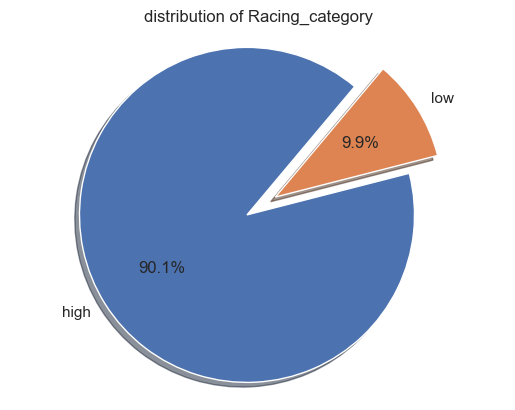

In [246]:
size = df['Rating_category'].value_counts()/len(df)*100
plt.pie(size,labels=size.index,autopct='%1.1f%%', startangle=50,shadow = True, explode =( 0,0.2))
plt.axis('equal')
plt.title('distribution of Racing_category')
plt.show()

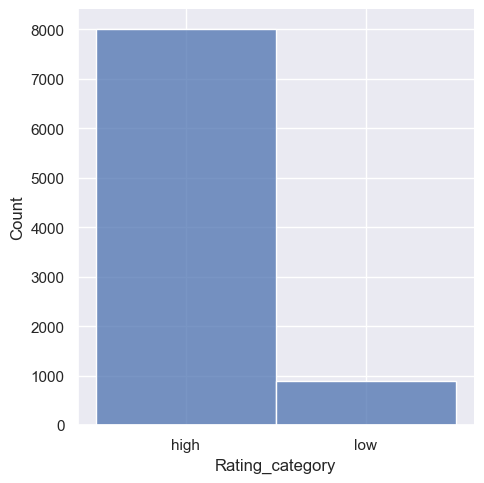

In [247]:
sns.displot(df['Rating_category'])
plt.show()

- Distribution of Rating_category can be seen in above plots.
- 90% of the data has high rating (approx 8000)  and less that 10% (880) of the data has low ratings.

### 8.0 Convert the column "Reviews'' to numeric data type and check the presence of outliers in the column and handle the outliers using a transformation approach.

In [248]:
df['Reviews']=df['Reviews'].astype('float')

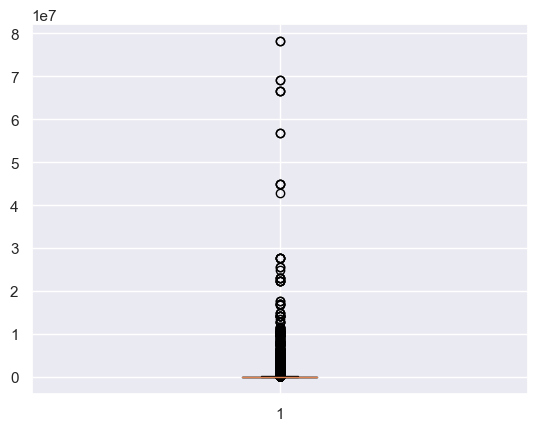

In [249]:
plt.boxplot(df['Reviews'])
plt.show()

In [250]:
df['Reviews_log'] = np.log1p(df['Reviews'])

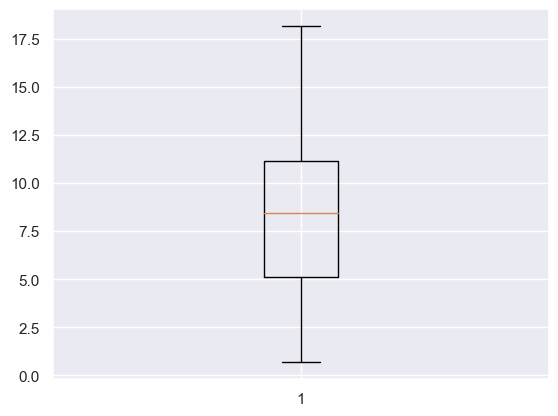

In [251]:
plt.boxplot(df['Reviews_log'])
plt.show()

- Data type of column Review is changed to float.
- There are multiple outliers present in the Column.
- Log transformation method is used to suppress the outliers.
***

### 9.0 Treating non numeric data in Column Size and converting to suitable data type.

In [252]:
df['Size'].sort_values()

6446                   1.0M
9973                   1.0M
10043                  1.0M
8077                   1.0M
8736                   1.1M
                ...        
8307     Varies with device
3236     Varies with device
3238     Varies with device
8298     Varies with device
3909     Varies with device
Name: Size, Length: 8892, dtype: object

In [253]:
df.drop(df[df['Size'] == 'Varies with device'].index,inplace=True)

In [254]:
df['Size']

0         19M
1         14M
2        8.7M
3         25M
4        2.8M
         ... 
10833    619k
10834    2.6M
10836     53M
10837    3.6M
10840     19M
Name: Size, Length: 7424, dtype: object

In [255]:
df['Size'].replace({'M':'*1000000','k':'*1000'},regex = True,inplace=True)

In [256]:
df['Size'] = df['Size'].map(eval)

In [257]:
df['Size']

0        19000000.0
1        14000000.0
2         8700000.0
3        25000000.0
4         2800000.0
            ...    
10833      619000.0
10834     2600000.0
10836    53000000.0
10837     3600000.0
10840    19000000.0
Name: Size, Length: 7424, dtype: float64

* Non numeric characters in the column Size is removed and the datatype of the column is converted to float.
***

### 10.0 Column 'Installs'.

In [258]:
df['Installs']

0            10,000+
1           500,000+
2         5,000,000+
3        50,000,000+
4           100,000+
            ...     
10833         1,000+
10834           500+
10836         5,000+
10837           100+
10840    10,000,000+
Name: Installs, Length: 7424, dtype: object

In [259]:
df['Installs'] = df['Installs'].str.replace('+','').str.replace(',','').astype('int')
df['Installs']

C:\Users\bhara\AppData\Local\Temp\ipykernel_13188\1371051915.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Installs'] = df['Installs'].str.replace('+','').str.replace(',','').astype('int')


0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10833        1000
10834         500
10836        5000
10837         100
10840    10000000
Name: Installs, Length: 7424, dtype: int32

* non numeric characters in the column Installs is removed and the datatype of the column is converted to int.
***

### 11.0 column 'Price'.

In [260]:
df['Price'].sort_values()

10675    $0.99
9060     $0.99
8012     $0.99
7665     $0.99
4621     $0.99
         ...  
4014         0
4013         0
4012         0
4023         0
10840        0
Name: Price, Length: 7424, dtype: object

In [261]:
df['Price']=df['Price'].str.replace('$','')

C:\Users\bhara\AppData\Local\Temp\ipykernel_13188\3004727282.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Price']=df['Price'].str.replace('$','')


In [262]:
df['Price'] = df['Price'].astype('float')
df['Price'].sort_values()

0         0.00
7291      0.00
7290      0.00
7289      0.00
7288      0.00
         ...  
5354    399.99
5356    399.99
5362    399.99
4197    399.99
4367    400.00
Name: Price, Length: 7424, dtype: float64

* non numeric characters in the column Price is removed and the datatype of the column is converted to float.
***

### 12. Dropping columns which are redundant for analysis.

In [263]:
df.drop(columns=['Rating','Reviews','App','Last Updated','Current Ver','Android Ver'],inplace=True)

In [264]:
df

,Category,Size,Installs,Type,Price,Content Rating,Genres,Rating_category,Reviews_log
0,ART_AND_DESIGN,19000000.0,10000,Free,0.0,Everyone,Art & Design,high,5.075174
1,ART_AND_DESIGN,14000000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,high,6.875232
2,ART_AND_DESIGN,8700000.0,5000000,Free,0.0,Everyone,Art & Design,high,11.379520
3,ART_AND_DESIGN,25000000.0,50000000,Free,0.0,Teen,Art & Design,high,12.281389
4,ART_AND_DESIGN,2800000.0,100000,Free,0.0,Everyone,Art & Design;Creativity,high,6.875232
...,...,...,...,...,...,...,...,...,...
10833,BOOKS_AND_REFERENCE,619000.0,1000,Free,0.0,Everyone,Books & Reference,high,3.806662
10834,FAMILY,2600000.0,500,Free,0.0,Everyone,Education,high,2.079442
10836,FAMILY,53000000.0,5000,Free,0.0,Everyone,Education,high,3.663562
10837,FAMILY,3600000.0,100,Free,0.0,Everyone,Education,high,1.609438


- Unnecessary columns like 'App','Last Updated','Current Ver','Android Ver' .etc  in the data is removed 
***

### 13.0 Encoding categorical columns

In [265]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Category'] = le.fit_transform(df['Category'])
df['Type'] = le.fit_transform(df['Type'])
df['Content Rating'] = le.fit_transform(df['Content Rating'])
df['Genres'] = le.fit_transform(df['Genres'])
df['Rating_category'] = le.fit_transform(df['Rating_category'])

In [266]:
df

,Category,Size,Installs,Type,Price,Content Rating,Genres,Rating_category,Reviews_log
0,0,19000000.0,10000,0,0.0,1,9,0,5.075174
1,0,14000000.0,500000,0,0.0,1,11,0,6.875232
2,0,8700000.0,5000000,0,0.0,1,9,0,11.379520
3,0,25000000.0,50000000,0,0.0,4,9,0,12.281389
4,0,2800000.0,100000,0,0.0,1,10,0,6.875232
...,...,...,...,...,...,...,...,...,...
10833,3,619000.0,1000,0,0.0,1,18,0,3.806662
10834,11,2600000.0,500,0,0.0,1,36,0,2.079442
10836,11,53000000.0,5000,0,0.0,1,36,0,3.663562
10837,11,3600000.0,100,0,0.0,1,36,0,1.609438


- Categorical variables in the data like Category, Type, Content Rating, etc is encoded using label encoder.
***

### 14.0  Segregate the target and independent features

In [267]:
X = df.drop(columns='Rating_category')
X

,Category,Size,Installs,Type,Price,Content Rating,Genres,Reviews_log
0,0,19000000.0,10000,0,0.0,1,9,5.075174
1,0,14000000.0,500000,0,0.0,1,11,6.875232
2,0,8700000.0,5000000,0,0.0,1,9,11.379520
3,0,25000000.0,50000000,0,0.0,4,9,12.281389
4,0,2800000.0,100000,0,0.0,1,10,6.875232
...,...,...,...,...,...,...,...,...
10833,3,619000.0,1000,0,0.0,1,18,3.806662
10834,11,2600000.0,500,0,0.0,1,36,2.079442
10836,11,53000000.0,5000,0,0.0,1,36,3.663562
10837,11,3600000.0,100,0,0.0,1,36,1.609438


In [268]:
y = df[['Rating_category']]
y

,Rating_category
0,0
1,0
2,0
3,0
4,0
...,...
10833,0
10834,0
10836,0
10837,0


Dependent and independent variables are selected as shown in above dataframes X and y.
***

### 15.0 Split the dataset into train and test.

In [269]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=20)

In [270]:
X_train

,Category,Size,Installs,Type,Price,Content Rating,Genres,Reviews_log
9142,14,22000000.0,50000000,0,0.0,2,84,15.022768
928,9,4400000.0,1000000,0,0.0,3,49,11.073629
6731,11,3300000.0,100,0,0.0,1,49,1.791759
6600,20,335000.0,10000,0,0.0,1,67,4.521789
5453,29,2800000.0,10000,0,0.0,1,103,5.181784
...,...,...,...,...,...,...,...,...
10783,14,72000000.0,50000,0,0.0,3,0,5.831882
10290,17,7400000.0,100000,0,0.0,1,63,7.288928
10789,14,48000000.0,50000,0,0.0,2,0,5.910797
6521,21,3800000.0,50000,0,0.0,1,71,6.280396


In [271]:
y_train

,Rating_category
9142,0
928,0
6731,0
6600,0
5453,0
...,...
10783,0
10290,0
10789,0
6521,0


In [272]:
X_test

,Category,Size,Installs,Type,Price,Content Rating,Genres,Reviews_log
5506,11,52000000.0,50,0,0.0,1,36,1.609438
3261,29,2500000.0,100000000,0,0.0,1,103,9.169831
8734,4,2700000.0,10000,0,0.0,1,20,2.772589
7243,18,8300000.0,100,0,0.0,1,64,1.791759
8261,14,92000000.0,50000000,0,0.0,4,0,14.719290
...,...,...,...,...,...,...,...,...
1532,17,8500.0,50000,0,0.0,1,63,5.472271
8175,29,26000000.0,50000000,0,0.0,1,103,14.799105
7823,11,6700000.0,5000,0,0.0,1,36,3.526361
6709,3,2100000.0,10000,0,0.0,1,18,5.056246


In [273]:
y_test

,Rating_category
5506,0
3261,0
8734,1
7243,0
8261,0
...,...
1532,0
8175,0
7823,0
6709,0


Data is splitted into Train and test with the ratio of 75:25 respectively.
***

### 16.0 Standardize the data.

In [274]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

X_train_ss = pd.DataFrame(ss.fit_transform(X_train))
X_train_ss.columns = X_train.columns

y_train_ss = pd.DataFrame(ss.fit_transform(y_train))
y_train_ss.columns = y_train.columns

X_test_ss = pd.DataFrame(ss.fit_transform(X_test))
X_test_ss.columns = X_test.columns

y_test_ss = pd.DataFrame(ss.fit_transform(y_test))
y_test_ss.columns = y_test.columns

In [275]:
X_train_ss

,Category,Size,Installs,Type,Price,Content Rating,Genres,Reviews_log
0,-0.314713,-0.023929,0.880574,-0.288197,-0.068554,0.529173,0.749435,2.016773
1,-0.933033,-0.778341,-0.147351,-0.288197,-0.068554,1.522243,-0.349345,0.938501
2,-0.685705,-0.825491,-0.168327,-0.288197,-0.068554,-0.463896,-0.349345,-1.595819
3,0.427272,-0.952584,-0.168120,-0.288197,-0.068554,-0.463896,0.215742,-0.850412
4,1.540249,-0.846924,-0.168120,-0.288197,-0.068554,-0.463896,1.345915,-0.670207
...,...,...,...,...,...,...,...,...
5563,-0.314713,2.119287,-0.167281,-0.288197,-0.068554,1.522243,-1.887637,-0.492705
5564,0.056280,-0.649748,-0.166232,-0.288197,-0.068554,-0.463896,0.090167,-0.094873
5565,-0.314713,1.090543,-0.167281,-0.288197,-0.068554,0.529173,-1.887637,-0.471158
5566,0.550936,-0.804059,-0.167281,-0.288197,-0.068554,-0.463896,0.341316,-0.370243


In [276]:
X_test_ss

,Category,Size,Installs,Type,Price,Content Rating,Genres,Reviews_log
0,-0.687980,1.208635,-0.172294,-0.262915,-0.174641,-0.461192,-0.748013,-1.600024
1,1.481962,-0.877089,2.212928,-0.262915,-0.174641,-0.461192,1.315545,0.406850
2,-1.531846,-0.868662,-0.172057,-0.262915,-0.174641,-0.461192,-1.240804,-1.291270
3,0.155887,-0.632701,-0.172293,-0.262915,-0.174641,-0.461192,0.114369,-1.551627
4,-0.326323,2.894068,1.020316,-0.262915,-0.174641,2.524757,-1.856791,1.879930
...,...,...,...,...,...,...,...,...
1851,0.035334,-0.982070,-0.171103,-0.262915,-0.174641,-0.461192,0.083570,-0.574651
1852,1.481962,0.113103,1.020316,-0.262915,-0.174641,-0.461192,1.315545,1.901117
1853,-0.687980,-0.700118,-0.172176,-0.262915,-0.174641,-0.461192,-0.748013,-1.091185
1854,-1.652398,-0.893943,-0.172057,-0.262915,-0.174641,-0.461192,-1.302402,-0.685083


In [277]:
y_train_ss

,Rating_category
0,-0.345573
1,-0.345573
2,-0.345573
3,-0.345573
4,-0.345573
...,...
5563,-0.345573
5564,-0.345573
5565,-0.345573
5566,-0.345573


In [278]:
y_test_ss

,Rating_category
0,-0.377033
1,-0.377033
2,2.652288
3,-0.377033
4,-0.377033
...,...
1851,-0.377033
1852,-0.377033
1853,-0.377033
1854,-0.377033


Data is standardized with the help of StandardScalar.
***